In [2]:
import pandas as pd
import numpy as np
import hvplot.pandas

In [3]:
# this website had the hsitorical inflation rate in table form

inf_url = "https://www.rateinflation.com/inflation-rate/australia-historical-inflation-rate/"

In [4]:
# I use the read_html method to grab the table data from the website

inflation_df = pd.read_html(inf_url)
inflation_df

[    Year    mar    jun    sep    dec  Annual
 0   2022   5.1%   6.1%    NaN    NaN     NaN
 1   2021   1.1%   3.8%   3.0%   3.5%    2.9%
 2   2020   2.2%  -0.3%   0.7%   0.9%    0.8%
 3   2019   1.3%   1.6%   1.7%   1.8%    1.6%
 4   2018   1.9%   2.1%   1.9%   1.8%    1.9%
 ..   ...    ...    ...    ...    ...     ...
 69  1953   6.8%   4.9%   4.8%   1.6%    4.5%
 70  1952  22.9%  19.6%  17.0%  10.5%   17.2%
 71  1951  14.3%  18.6%  20.5%  23.9%   19.4%
 72  1950   7.7%   7.5%   7.3%  12.2%    8.7%
 73  1949     ∞%     ∞%  10.8%   7.9%  114.7%
 
 [74 rows x 6 columns]]

In [5]:
# I take the object returned and save it as a dataframe

inflation_df = inflation_df[0]
inflation_df

,Year,mar,jun,sep,dec,Annual
0,2022,5.1%,6.1%,NaN,NaN,NaN
1,2021,1.1%,3.8%,3.0%,3.5%,2.9%
2,2020,2.2%,-0.3%,0.7%,0.9%,0.8%
3,2019,1.3%,1.6%,1.7%,1.8%,1.6%
4,2018,1.9%,2.1%,1.9%,1.8%,1.9%
...,...,...,...,...,...,...
69,1953,6.8%,4.9%,4.8%,1.6%,4.5%
70,1952,22.9%,19.6%,17.0%,10.5%,17.2%
71,1951,14.3%,18.6%,20.5%,23.9%,19.4%
72,1950,7.7%,7.5%,7.3%,12.2%,8.7%


In [6]:
# I set the index for the inflation data as "Year"

inflation_df = inflation_df.set_index("Year")
inflation_df.index

Int64Index([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
            2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
            2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
            1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
            1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
            1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957,
            1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949],
           dtype='int64', name='Year')

In [7]:
# I pulled out only the annual inflation rate
# I also clean this column by removing the '%' and convert to a float

inflation_df["Annual"] = inflation_df["Annual"].str.replace("%", "").astype(float)
inflation_df["Annual"]

Year
2022      NaN
2021      2.9
2020      0.8
2019      1.6
2018      1.9
        ...  
1953      4.5
1952     17.2
1951     19.4
1950      8.7
1949    114.7
Name: Annual, Length: 74, dtype: float64

In [8]:
inflation_df.head()

,mar,jun,sep,dec,Annual
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9


In [9]:
# Here I rename the Annual column as this will conflict with CPI dataset

inflation_df.rename(columns = {'Annual':'Annual_Inflation'}, inplace = True)
inflation_df

,mar,jun,sep,dec,Annual_Inflation
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9
...,...,...,...,...,...
1953,6.8%,4.9%,4.8%,1.6%,4.5
1952,22.9%,19.6%,17.0%,10.5%,17.2
1951,14.3%,18.6%,20.5%,23.9%,19.4


In [10]:
# And finally I plot the "Annual Inflation dataset

inflation_df["Annual_Inflation"].hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (Annual_Inflation)

## Analysis

In the above plot we can see the rise in inflation rate during the 1970's, declining from a peak of 15.4 in 1974.
Looking at the 2020's we see a marked increase in the inflation rate. The question is, will this trend continue.

In [11]:
# here is split the inflation data. I isolate 1966 - 1979
# I can thereby see the lead up to the spiralling inflation of the 70's

seventies_df = inflation_df.rename(columns = {'Annual_Inflation':'seventies_inflation'})
seventies_df = seventies_df["seventies_inflation"].iloc[43:57]
seventies_df

Year
1979     9.1
1978     8.0
1977    12.3
1976    13.3
1975    15.2
1974    15.4
1973     9.1
1972     6.0
1971     6.1
1970     3.4
1969     3.3
1968     2.5
1967     3.5
1966     3.3
Name: seventies_inflation, dtype: float64

In [12]:
# here is a plot of 1966-1979 inflation rate
# from steady to a massive increase in the middle of the decade

seventies_df.hvplot(
    label="Seventies Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (seventies_inflation)

### Analysis

In the above graph of inflation from 1966 to 1979, we see a relatively flate rate during the latter half of the 1960's. From 1970's there is a marked increase which continues to increase in the first half of the decade, peaking at 15.4% in 1974.

In [18]:
# here I pull out the recent inflation rate
# I call it twenties however it includes 2010 - 2021

twenties_df = inflation_df.rename(columns = {'Annual_Inflation':'twenties_inflation'})
twenties_df = twenties_df["twenties_inflation"].iloc[1:13]

In [19]:
twenties_df

Year
2021    2.9
2020    0.8
2019    1.6
2018    1.9
2017    1.9
2016    1.3
2015    1.5
2014    2.5
2013    2.4
2012    1.8
2011    3.3
2010    2.9
Name: twenties_inflation, dtype: float64

In [20]:
twenties_df.hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (twenties_inflation)

### Analysis

The above plot for inflation in the period 2010 to 2021 shows a declining rate during the 2010's from a high of 3.3% in 2011. In 2020 we see a marked increase, rising from 0.8% in 2020 to 2.9% in 2021 (and continuing to rise in 2022 to 6.1% currently).

The similarities between 2020 and 1970, at least in inflation rates, is cause for a closer look.

In [21]:
display(seventies_df.head(5))
display(twenties_df.head(5))

Year
1979     9.1
1978     8.0
1977    12.3
1976    13.3
1975    15.2
Name: seventies_inflation, dtype: float64

Year
2021    2.9
2020    0.8
2019    1.6
2018    1.9
2017    1.9
Name: twenties_inflation, dtype: float64

In [24]:
seventies_inf = seventies_df.reset_index().drop(["Year"], axis=1)
seventies_inf

,seventies_inflation
0,9.1
1,8.0
2,12.3
3,13.3
4,15.2
5,15.4
6,9.1
7,6.0
8,6.1
9,3.4


In [25]:
twenties_inf = twenties_df.reset_index().drop(["Year"], axis=1)
twenties_inf

,twenties_inflation
0,2.9
1,0.8
2,1.6
3,1.9
4,1.9
5,1.3
6,1.5
7,2.5
8,2.4
9,1.8


In [26]:
comparison = pd.concat([seventies_inf, twenties_inf], axis=1)

In [27]:
comparison

,seventies_inflation,twenties_inflation
0,9.1,2.9
1,8.0,0.8
2,12.3,1.6
3,13.3,1.9
4,15.2,1.9
5,15.4,1.3
6,9.1,1.5
7,6.0,2.5
8,6.1,2.4
9,3.4,1.8


In [28]:
comparison.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [58]:
comparison.corr()

,seventies_inflation,twenties_inflation
seventies_inflation,1.000000,-0.536657
twenties_inflation,-0.536657,1.000000


## CPI

In [31]:
# This website had the historical data for CPI back to 1948

cpi_url = "https://www.rateinflation.com/consumer-price-index/australia-historical-cpi/"

In [32]:
# I use the read_html method to read in the table data

df = pd.read_html(cpi_url)
df

[    Year    mar    jun    sep    dec  Annual
 0   2022  123.9  126.1    NaN    NaN     NaN
 1   2021  117.9  118.8  119.7  121.3   119.4
 2   2020  116.6  114.4  116.2  117.2   116.1
 3   2019  114.1  114.8  115.4  116.2   115.1
 4   2018  112.6  113.0  113.5  114.1   113.3
 ..   ...    ...    ...    ...    ...     ...
 70  1952    5.9    6.1    6.2    6.3     6.1
 71  1951    4.8    5.1    5.3    5.7     5.2
 72  1950    4.2    4.3    4.4    4.6     4.4
 73  1949    3.9    4.0    4.1    4.1     4.0
 74  1948    NaN    NaN    3.7    3.8     NaN
 
 [75 rows x 6 columns]]

In [33]:
# I then convert it to a pandas DataFrame

cpi_df = df[0]

In [34]:
type(cpi_df)

pandas.core.frame.DataFrame

In [35]:
# set the index as the 'Year' column

cpi_df = cpi_df.set_index("Year")

In [36]:
# sort the index so that it is ascending (1948 - 2022)

cpi_df = cpi_df.sort_index()

In [37]:
cpi_df.index

Int64Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
            1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='Year')

In [38]:
# a bar graph of the annual CPI

cpi_df["Annual"].hvplot.bar(
    label="Annual CPI 1948-2022",
    xlabel="Year",
    ylabel="CPI",
    width=1000,
    rot=90
)

:Bars   [Year]   (Annual)

In [39]:
cpi_df.info

<bound method DataFrame.info of         mar    jun    sep    dec  Annual
Year                                    
1948    NaN    NaN    3.7    3.8     NaN
1949    3.9    4.0    4.1    4.1     4.0
1950    4.2    4.3    4.4    4.6     4.4
1951    4.8    5.1    5.3    5.7     5.2
1952    5.9    6.1    6.2    6.3     6.1
...     ...    ...    ...    ...     ...
2018  112.6  113.0  113.5  114.1   113.3
2019  114.1  114.8  115.4  116.2   115.1
2020  116.6  114.4  116.2  117.2   116.1
2021  117.9  118.8  119.7  121.3   119.4
2022  123.9  126.1    NaN    NaN     NaN

[75 rows x 5 columns]>

In [40]:
# and a line plot of the Annual CPI Rate

cpi_df["Annual"].hvplot.line(
    label="Annual CPI Rate",
    xlabel="Year",
    ylabel="CPI Rate",
    width=800
)

:Curve   [Year]   (Annual)

### Analysis

The Consumer Price Index (CPI) has shown an increase since 1950. However, it is only after 1970 that we see CPI making recognisable increases year over year. This, of course, coincides with our period of focus for high inflation.

What changed in the 1970's? "WTF happened in 1971" is an often asked question.

What is interesting to note is that, while inflation as a general figure of a whole economy's prices was brought under control, CPI was not. CPI has shown no decrease, displaying a constant trend of "number go up", unfortunately for most it is the very thing we - cost of living - that we do not want increasing.

In [41]:
# I pull out the data from 1966 - 1979
# this includes the lead up to the spiralling 1970's inflation

seventies_cpi = cpi_df.rename(columns = {'Annual':'seventies_cpi'}).iloc[18:32]

seventies_cpi = seventies_cpi.drop(["mar", "jun", "sep", "dec"], axis=1)
seventies_cpi

,seventies_cpi
Year,
1966,8.6
1967,8.9
1968,9.1
1969,9.5
1970,9.8
1971,10.4
1972,11.0
1973,12.0
1974,13.9


In [42]:
seventies_cpi["seventies_cpi"].hvplot(
    label="Annual CPI in the 1970's",
    xlabel="Year",
    ylabel="CPI"
)

:Curve   [Year]   (seventies_cpi)

In [43]:
# here I pull out the 2013-2021 CPI

twenties_cpi = cpi_df.rename(columns = {'Annual':'twenties_cpi'}).iloc[65:75]

twenties_cpi = twenties_cpi.drop(["mar", "jun", "sep", "dec"], axis=1)
twenties_cpi

,twenties_cpi
Year,
2013,103.5
2014,106.1
2015,107.7
2016,109.1
2017,111.2
2018,113.3
2019,115.1
2020,116.1
2021,119.4


In [44]:
twenties_cpi["twenties_cpi"].hvplot(
    label="Annual Inflation in the 2010's and Up",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (twenties_cpi)

In [45]:
seventies_cpi = seventies_cpi.reset_index().drop(["Year"], axis=1)
twenties_cpi = twenties_cpi.reset_index().drop(["Year"], axis=1)

display(seventies_cpi.head(5))
display(twenties_cpi.head(5))

,seventies_cpi
0,8.6
1,8.9
2,9.1
3,9.5
4,9.8


,twenties_cpi
0,103.5
1,106.1
2,107.7
3,109.1
4,111.2


In [47]:
cpi_comparison = pd.concat([seventies_cpi, twenties_cpi],axis=1,join="inner")
cpi_comparison

,seventies_cpi,twenties_cpi
0,8.6,103.5
1,8.9,106.1
2,9.1,107.7
3,9.5,109.1
4,9.8,111.2
5,10.4,113.3
6,11.0,115.1
7,12.0,116.1
8,13.9,119.4
9,16.0,NaN


In [48]:
cpi_comparison.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [55]:
# here I find the correlation between 1970's and twenties CPI.
# the matrix show a high correlation between the two, which is not surprising
cpi_corr = cpi_comparison.corr()
cpi_corr

,seventies_cpi,twenties_cpi
seventies_cpi,1.000000,0.945493
twenties_cpi,0.945493,1.000000


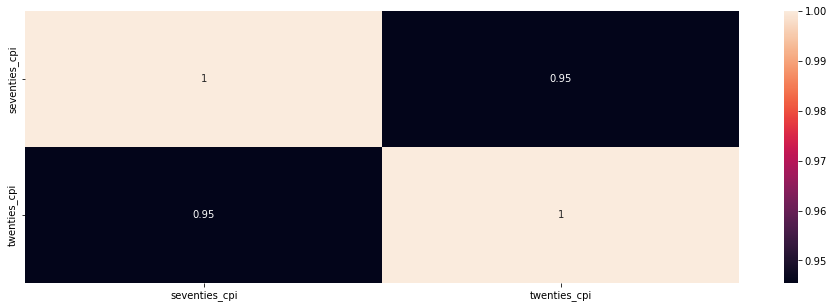

In [53]:
# using seaborn I can create a heatmap of our matrix with annotations

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,5))
sns.heatmap(cpi_corr, annot=True)
plt.show()

### Analysis

There is not much to draw from this plot of CPI in the 70's and the 2020's nor the correlation table. There is a constant, steady incline for both periods. And the correlation matrix show an almost 1:1 correlation between the two periods. This would not surprise anyone in Australia who has experienced steady increases in the price of fundamental goods and services in recent decades.

With such a steady increase, lacking any volatility, seeminly immune to the affects of macro conditions and government actions, the value of CPI is in doubt. We can confidently say that the number will be roughly 1 to 3 percent higher next year, and the year after that, regardless of general inflation.

In [49]:
# Inflation and CPI, for 1966-1979 and 2010-2021 concatenated

cpi_inf = pd.concat([seventies_cpi, twenties_cpi, comparison], axis=1)
cpi_inf

,seventies_cpi,twenties_cpi,seventies_inflation,twenties_inflation
0,8.6,103.5,9.1,2.9
1,8.9,106.1,8.0,0.8
2,9.1,107.7,12.3,1.6
3,9.5,109.1,13.3,1.9
4,9.8,111.2,15.2,1.9
5,10.4,113.3,15.4,1.3
6,11.0,115.1,9.1,1.5
7,12.0,116.1,6.0,2.5
8,13.9,119.4,6.1,2.4
9,16.0,NaN,3.4,1.8


In [50]:
cpi_inf.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
from MCForecastTools import MCSimulation

In [59]:
housing_df = pd.read_csv("Australian Bureau of Statistics.csv")
housing_df

,Residential property prices,Sep Qtr 21 to Dec Qtr 21,Dec Qtr 20 to Dec Qtr 21
0,NaN,% change,% change
1,Weighted average of eight capital cities,4.7,23.7
2,Sydney,4.1,26.7
3,Melbourne,3.9,20.0
4,Brisbane,9.6,27.8
5,Adelaide,6.8,23.9
6,Perth,2.9,15.7
7,Hobart,6.5,29.8
8,Darwin,1.5,13.0
9,Canberra,6.4,28.8


In [60]:
housing_df = housing_df.drop(["Sep Qtr 21 to Dec Qtr 21"], axis=1)

In [61]:
housing_df = housing_df.drop([0, 1, 10, 11], axis=0)


In [62]:
housing_df.rename(columns = {'Residential property prices':'Place Name'}, inplace = True)
housing_df = housing_df.set_index("Place Name")
housing_df

,Dec Qtr 20 to Dec Qtr 21
Place Name,
Sydney,26.7
Melbourne,20.0
Brisbane,27.8
Adelaide,23.9
Perth,15.7
Hobart,29.8
Darwin,13.0
Canberra,28.8


In [63]:
housing_df = housing_df["Dec Qtr 20 to Dec Qtr 21"].astype(float)
housing_df

Place Name
Sydney       26.7
Melbourne    20.0
Brisbane     27.8
Adelaide     23.9
Perth        15.7
Hobart       29.8
Darwin       13.0
Canberra     28.8
Name: Dec Qtr 20 to Dec Qtr 21, dtype: float64

In [65]:
housing_df.hvplot(
    kind="bar",
    ylabel="Inflation",
    width=800,
    height=600,
    label= "Housing Inflation - Australian Capital Cities")

:Bars   [Place Name]   (Dec Qtr 20 to Dec Qtr 21)

In [66]:
geo_url = "https://www.latlong.net/category/cities-14-15.html"

In [67]:
geo_df = pd.read_html(geo_url)
geo_df = geo_df[0]
geo_df

,Place Name,Latitude,Longitude
0,"Tamworth, NSW, Australia",-31.083332,150.916672
1,"Queanbeyan, NSW, Australia",-35.353333,149.234161
2,"Penrith, NSW, Australia",-33.758011,150.705444
3,"Newcastle, NSW, Australia",-32.916668,151.750000
4,"Liverpool, NSW, Australia",-33.920921,150.923141
...,...,...,...
84,"Gladstone QLD, Australia",-23.843138,151.268356
85,"Gosford, NSW, Australia",-33.425018,151.342224
86,"Mount Gambier, SA, Australia",-37.824429,140.783783
87,"Sydney, NSW, Australia",-33.865143,151.209900


In [68]:
capital_indexes = [geo_df.loc[geo_df["Place Name"]=="Sydney, NSW, Australia"],
geo_df.loc[geo_df["Place Name"]=="Melbourne, VIC, Australia"],
geo_df.loc[geo_df["Place Name"]=="Brisbane, QLD, Australia"],
geo_df.loc[geo_df["Place Name"]=="Adelaide, SA, Australia"],
geo_df.loc[geo_df["Place Name"]=="Melbourne, VIC, Australia"],
geo_df.loc[geo_df["Place Name"]=="Perth, WA, Australia"],
geo_df.loc[geo_df["Place Name"]=="Hobart, Tasmania, Australia"],
geo_df.loc[geo_df["Place Name"]=="Darwin, Northern Territory, Australia"],
geo_df.loc[geo_df["Place Name"]=="Canberra, Australia"]]
capital_indexes

[                Place Name   Latitude  Longitude
 87  Sydney, NSW, Australia -33.865143   151.2099,
                    Place Name   Latitude   Longitude
 63  Melbourne, VIC, Australia -37.840935  144.946457,
                   Place Name   Latitude   Longitude
 83  Brisbane, QLD, Australia -27.470125  153.021072,
                  Place Name  Latitude   Longitude
 64  Adelaide, SA, Australia -34.92123  138.599503,
                    Place Name   Latitude   Longitude
 63  Melbourne, VIC, Australia -37.840935  144.946457,
               Place Name   Latitude   Longitude
 69  Perth, WA, Australia -31.953512  115.857048,
                      Place Name   Latitude   Longitude
 45  Hobart, Tasmania, Australia -42.880554  147.324997,
                                Place Name   Latitude   Longitude
 79  Darwin, Northern Territory, Australia -12.462827  130.841782,
              Place Name   Latitude   Longitude
 60  Canberra, Australia -35.282001  149.128998]

In [69]:
capital_df = geo_df.iloc[[87,63,83,64,63,69,45,79,60]]
capital_df

,Place Name,Latitude,Longitude
87,"Sydney, NSW, Australia",-33.865143,151.209900
63,"Melbourne, VIC, Australia",-37.840935,144.946457
83,"Brisbane, QLD, Australia",-27.470125,153.021072
64,"Adelaide, SA, Australia",-34.921230,138.599503
63,"Melbourne, VIC, Australia",-37.840935,144.946457
69,"Perth, WA, Australia",-31.953512,115.857048
45,"Hobart, Tasmania, Australia",-42.880554,147.324997
79,"Darwin, Northern Territory, Australia",-12.462827,130.841782
60,"Canberra, Australia",-35.282001,149.128998


In [70]:
capital_df = capital_df.set_index(capital_df["Place Name"].apply(lambda Name : Name.split()[0]).str.replace(",",""))

In [71]:
capital_df = capital_df.drop(["Place Name"], axis=1)
capital_df

,Latitude,Longitude
Place Name,,
Sydney,-33.865143,151.209900
Melbourne,-37.840935,144.946457
Brisbane,-27.470125,153.021072
Adelaide,-34.921230,138.599503
Melbourne,-37.840935,144.946457
Perth,-31.953512,115.857048
Hobart,-42.880554,147.324997
Darwin,-12.462827,130.841782
Canberra,-35.282001,149.128998


In [72]:
housing_df

Place Name
Sydney       26.7
Melbourne    20.0
Brisbane     27.8
Adelaide     23.9
Perth        15.7
Hobart       29.8
Darwin       13.0
Canberra     28.8
Name: Dec Qtr 20 to Dec Qtr 21, dtype: float64

In [73]:
housing_inflation = pd.merge(housing_df, capital_df, on = "Place Name", how = "inner")

In [74]:
housing_inflation["Dec Qtr 20 to Dec Qtr 21"].astype(float)

Place Name
Sydney       26.7
Melbourne    20.0
Melbourne    20.0
Brisbane     27.8
Adelaide     23.9
Perth        15.7
Hobart       29.8
Darwin       13.0
Canberra     28.8
Name: Dec Qtr 20 to Dec Qtr 21, dtype: float64

In [75]:
housing_inflation

,Dec Qtr 20 to Dec Qtr 21,Latitude,Longitude
Place Name,,,
Sydney,26.7,-33.865143,151.209900
Melbourne,20.0,-37.840935,144.946457
Melbourne,20.0,-37.840935,144.946457
Brisbane,27.8,-27.470125,153.021072
Adelaide,23.9,-34.921230,138.599503
Perth,15.7,-31.953512,115.857048
Hobart,29.8,-42.880554,147.324997
Darwin,13.0,-12.462827,130.841782
Canberra,28.8,-35.282001,149.128998


In [76]:
map_plot = housing_inflation.hvplot.points(
    "Longitude", #set the longitude using the 'Lon' column from our data set
    "Latitude", #set the latitude using the 'Lat' column from our data set
    geo=True, # create a GeoViews graph by setting geo to True
    size="Dec Qtr 20 to Dec Qtr 21",
    color="Dec Qtr 20 to Dec Qtr 21",
    frame_width=700,
    frame_height=500,
    tiles="OSM", #using the default 'OSM' tiles  - this variable could be omitted
    alpha=0.8,
    xlabel="Longitude",
    ylabel="Latitude"
).opts(
    title="Housing Inflation - Australian Capital Cities"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Dec Qtr 20 to Dec Qtr 21)

### Analysis

The above goeviews plot is a little underwhelming, however, coupled with the numerical data, we can see that Hobart and Canberra experienced the highest housing inflation in the period 2020 - 2021 at 29.8 and 28.8 respectively. This is signified in the plot by the darker colors for the two cities. Sydney is not far behind with an inflation rate of  . Interestingly Melbourne was sixth

Gold Price

In [34]:
# Import library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import hvplot.pandas

In [35]:
# Fetch the raw data from the URL
html_text = requests.get('https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart').text

In [36]:
# Use find() function to enter the layers of the table that needs to be scraped
soup = BeautifulSoup(html_text, 'lxml')
div = soup.find('div', class_ = 'col-xs-9', style="margin-bottom:200px;")
div_1 = div.find(id="style-1")
tb = div_1.find('table', class_ = 'table')
gold_price = tb.find('tbody')

# Build two empty list for the loop
Year = []
Price = []

# Use for loop to loop through the data in the table to the list 
for row in gold_price.find_all('tr'):    
    Year.append((row.find(style ="text-align:center").text))
    Price.append((row.find(style ="text-align:center;").text))

# Put the two lists into a dataframe
gold = pd.DataFrame(data = {'Year' : Year, 'Gold Price' : Price}, columns=['Year', 'Gold Price'])
gold.set_index(['Year'])

# Clean the final data
gold["Gold Price"] = gold["Gold Price"].str.replace("$", "")
gold["Gold Price"] = gold["Gold Price"].str.replace(",", "").astype(float)

# Change year column to descending
gold = gold.sort_index(ascending=False)

# hvplot visualisation
gold.hvplot.line(
    x="Year",
    ylabel="Price",
    xlabel="Year",
    label="Gold Price 1969 - 2022",
    rot=45,
    width=800,
    height=600
)


C:\Users\malco\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


:Curve   [Year]   (Gold Price)

In [49]:
display(gold.head(5))
display(inflation_df["Annual_Inflation"].head(5))

,Year,Gold Price
53,1969,41.10
52,1970,35.96
51,1971,40.80
50,1972,58.17
49,1973,97.12


Year
2022    NaN
2021    2.9
2020    0.8
2019    1.6
2018    1.9
Name: Annual_Inflation, dtype: float64

In [43]:
ann_inf = inflation_df["Annual_Inflation"]

In [53]:
gold_df = gold.set_index(["Year"])
gold_df.head(5)

,Gold Price
Year,
1969,41.10
1970,35.96
1971,40.80
1972,58.17
1973,97.12


In [55]:
ann_inf = ann_inf.sort_index(ascending=True)

Year
1949    114.7
1950      8.7
1951     19.4
1952     17.2
1953      4.5
        ...  
2018      1.9
2019      1.6
2020      0.8
2021      2.9
2022      NaN
Name: Annual_Inflation, Length: 74, dtype: float64

In [57]:
gold_vs_inflation = pd.concat([ann_inf, gold_df], axis=1)
gold_vs_inflation

,Annual_Inflation,Gold Price
Year,,
1949,114.7,NaN
1950,8.7,NaN
1951,19.4,NaN
1952,17.2,NaN
1953,4.5,NaN
...,...,...
2018,NaN,1268.93
2019,NaN,1393.34
2020,NaN,1773.73


In [60]:
gvi = gold_vs_inflation.corr()
gvi

,Annual_Inflation,Gold Price
Annual_Inflation,1.0,NaN
Gold Price,NaN,1.0


Wage

In [ ]:
# From 1967 to 1979, the data was manually imported from the archived documents in ABS
date = [
    '1967-Q1',
    '1967-Q2', 
    '1967-Q3', 
    '1967-Q4',
    '1968-Q1',
    '1968-Q2',
    '1968-Q3',
    '1968-Q4',
    '1969-Q1',
    '1969-Q2',
    '1969-Q3',
    '1969-Q4',
    '1970-Q1',
    '1970-Q2',
    '1970-Q3',
    '1970-Q4',
    '1971-Q1',
    '1971-Q2',
    '1971-Q3',
    '1971-Q4',
    '1972-Q1',
    '1972-Q2',
    '1972-Q3',
    '1972-Q4',
    '1973-Q1',
    '1973-Q2',
    '1973-Q3',
    '1973-Q4',
    '1974-Q1',
    '1974-Q2',
    '1974-Q3',
    '1974-Q4',
    '1975-Q1',
    '1975-Q2',
    '1975-Q3',
    '1975-Q4',
    '1976-Q1',
    '1976-Q2',
    '1976-Q3',
    '1976-Q4',
    '1977-Q1',
    '1977-Q2',
    '1977-Q3',
    '1977-Q4',
    '1978-Q1',
    '1978-Q2',
    '1978-Q3',
    '1978-Q4',
]

value = [
    62.00,
    63.2,
    64.3,
    64.9,
    65.4,
    66.8,
    67.7,
    69.8,
    71.6,
    72.2,
    73.6,
    75.1,
    77,
    78.8,
    80,
    82,
    87,
    88.3,
    90,
    91.8,
    93.4,
    95.2,
    97.9,
    100.10,
    102,
    106.3,
    111.9,
    115,
    118.8,
    127.7,
    140,
    148,
    151,
    155.3,
    159.1,
    167.5,
    170.7,
    179,
    184.7,
    187.4,
    192,
    198,
    204.5,
    205.2,
    213,
    215.6,
    220.6,
    221,
]

In [ ]:
# Create a dataframe to store the data
df = pd.DataFrame()
df['Time'] = date
df['Weekly Wgae'] = value
df.set_index(['Time'], inplace = True)

# Visualise the data
wage_plot = df.hvplot(rot = 90)
wage_plot

In [2]:
# From
import pandas as pd
import requests

response_data = requests.get('https://api.data.abs.gov.au/data/ABS,WPI,1.0.0/1.THRPEB.7.TOT.10.AUS.Q?startPeriod=1997-Q3&endPeriod=2022-Q1&detail=dataonly&format=jsondata')
response_content = response_data.content

In [3]:
# Change the data format to json
import json
data = response_data.json()

In [5]:
# Enter the final layer in the ABS api
data_1 = pd.DataFrame(data)
pd.DataFrame(data_1["data"])

data_3 = data_1["data"]['structure']
data_4 = data_3['dimensions']['observation'][0]['values']

# Create an empty list for wpi timeline
wpi_name = []

# Loop the wpi timeline into a list
for i in data_4:
    ls = i['id']
    wpi_name.append(ls)

data_2 = data_1["data"]['dataSets']
data_final = data_2[0]['series']['0:0:0:0:0:0:0']['observations']

# Reverse the rows and columns to be plotted
df_1 = pd.DataFrame(data_final).T
df_1.columns = ['WPI']

# Modify the data structure
df_1['Time'] = wpi_name
df1 = df_1.set_index(['Time'])

# Plot the data
df_plot = df1.plot(kind = 'line')
df_plot